# APS1070
#### PCA - Project 3
**Deadline: March 13, 23:59 - 10 points**

Please fill out the following:


*   Your **name**: Amey Mulay
*   Your **student number**: 1005574530



Project 3 is structured a bit differently than Projects 1 and 2 - here, all the code for the tutorial part is given. You're encouraged to read closely, adjust and experiment to make sure you fully understand what the code is doing. Once you have a firm grasp of PCA, you should be in great shape for the exercises at the end. 

##**Marking Scheme:**

This project is worth **10 marks** of your final grade.

**One (1) mark** of the lab is dedicated to **vectorized coding**. If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases loops are inevitable).

This notebook is composed of two sections, a Tutorial, and an Exercise. 

The TAs in the lab will help you go through your tutorial (Understanding the tutorial part can help you finish the exercise part). 

**The exercise** section is worth **9 points**.

##**Important Note:**
1] Start lab early so that you understand concepts in Tutorial well & get enough time to implement exercise

2] It is important to **run and understand the tutorial part** of the notebook.

3] Provide a graphical representation of data wherever necessary.



## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. Complete exercises.


## Principle Component Analysis - Introduction

### Principle Component Analysis

As you get deeper in the world of data science, you'll learn that in practice it's very uncommon to work with datasets that are 2 or 3 dimensional, and so can be plotted directly. We're now going to look at _dimensionality reduction_ : a category of unsupervised algorithms which attempt to collapse high-dimensional datasets into a low-dimensional space.

As suggested above, one reason to do this is to aid visualization. However, that's far from the only reason dimensionality reduction is useful! These techniques also allow us to filter noise, extract useful features, and accomplish much more.

Let's dive into PCA with the Iris dataset.

### PCA - Overview

1. Standardize the data.


2. Obtain the Eigenvectors and Eigenvalues from the Covariance matrix (or Correlation matrix), or perform Singular Vector Decomposition.


3. Sort eigenvalues in descending order and choose the 𝑘 eigenvectors that correspond to the 𝑘 largest eigenvalues where 𝑘 is the number of dimensions of the new feature subspace. 𝑘 is less than original dimensionality.


4. Construct the projection matrix 𝐖 from the selected 𝑘 eigenvectors.


5. Transform the original dataset 𝐗 via 𝐖 to obtain a 𝑘-dimensional feature subspace 𝐘.

## PCA - Iris dataset

What's that flower?

### Intro

For the following tutorial, we will be working with the famous "Iris" dataset that has been deposited on the UCI machine learning repository
(https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset are:
1. Iris-setosa (n=50)
1. Iris-versicolor (n=50)
1. Iris-virginica (n=50)

And the four features of in Iris dataset are:
1. sepal length in cm
1. sepal width in cm
1. petal length in cm
1. petal width in cm

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [5]:
df.iloc[:,0:4]

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df.iloc[:,4]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [7]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [8]:
labels = set(y)
labels

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

### Exploratory Data Analysis

Let's explore a bit.

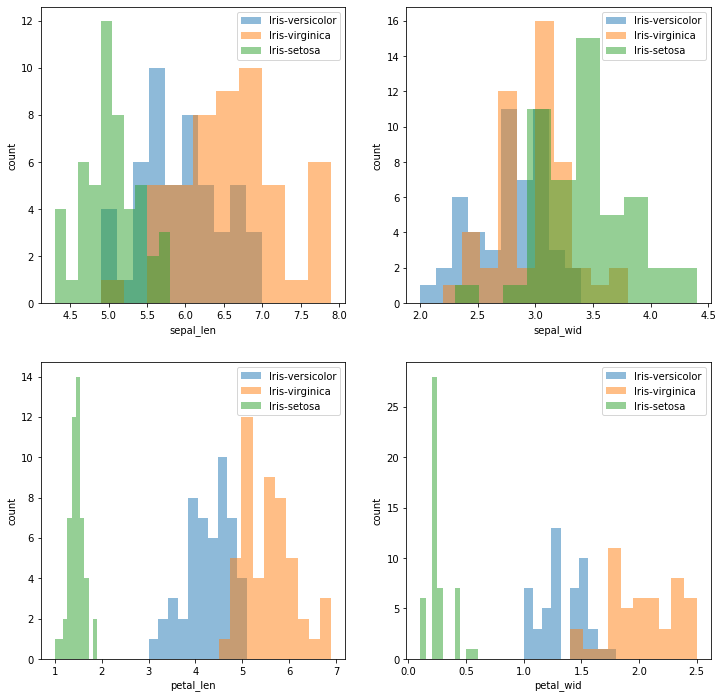

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
noOfCols = X.shape[1]

# iterate over each column (feature), and plot in separate sub-plot.
for col in range(noOfCols):
    # plot data for different labels for choosen column (feature).
    for label in labels:
        axes.flat[col].hist(X[y==label, col], alpha=0.5, label=label)
        
    axes.flat[col].legend(loc='upper right')
    axes.flat[col].set(xlabel=df.columns[col], ylabel='count')

As one can see, no feature can on it's own predict the class of the flower.

### Standardizing Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. 

Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [0]:
X_std = StandardScaler().fit_transform(X)

In [11]:
X[:, 0].mean(), X_std[:, 0].mean()

(5.843333333333334, -4.736951571734001e-16)

In [12]:
X[:, 0].var(), X_std[:, 0].var()

(0.6811222222222223, 1.0)

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

Methods to perform PCA:
1. The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a 𝑑×𝑑 matrix where each element represents the covariance between two features.
2. But, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency.

#### Using Covariance Matrix

In [13]:
n, m = X_std.shape
print(n, m)

# Compute covariance matrix
C = np.dot(X_std.T, X_std) / (n-1) 
# or C = np.cov(X_std.T)

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C) 
eigenVectors, eigenValues

150 4


(array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]),
 array([2.93035378, 0.92740362, 0.14834223, 0.02074601]))

In [14]:
print(X_std.T)

[[-9.00681170e-01 -1.14301691e+00 -1.38535265e+00 -1.50652052e+00
  -1.02184904e+00 -5.37177559e-01 -1.50652052e+00 -1.02184904e+00
  -1.74885626e+00 -1.14301691e+00 -5.37177559e-01 -1.26418478e+00
  -1.26418478e+00 -1.87002413e+00 -5.25060772e-02 -1.73673948e-01
  -5.37177559e-01 -9.00681170e-01 -1.73673948e-01 -9.00681170e-01
  -5.37177559e-01 -9.00681170e-01 -1.50652052e+00 -9.00681170e-01
  -1.26418478e+00 -1.02184904e+00 -1.02184904e+00 -7.79513300e-01
  -7.79513300e-01 -1.38535265e+00 -1.26418478e+00 -5.37177559e-01
  -7.79513300e-01 -4.16009689e-01 -1.14301691e+00 -1.02184904e+00
  -4.16009689e-01 -1.14301691e+00 -1.74885626e+00 -9.00681170e-01
  -1.02184904e+00 -1.62768839e+00 -1.74885626e+00 -1.02184904e+00
  -9.00681170e-01 -1.26418478e+00 -9.00681170e-01 -1.50652052e+00
  -6.58345429e-01 -1.02184904e+00  1.40150837e+00  6.74501145e-01
   1.28034050e+00 -4.16009689e-01  7.95669016e-01 -1.73673948e-01
   5.53333275e-01 -1.14301691e+00  9.16836886e-01 -7.79513300e-01
  -1.02184

#### Using Singular Vector Decomposition

In [15]:
eigenVectors, s, v = np.linalg.svd(X_std.T)
eigenVectors

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [16]:
print(s)

[20.89551896 11.75513248  4.7013819   1.75816839]


In [17]:
print(v)

[[ 1.08374515e-01  9.98503796e-02  1.13323362e-01 ... -7.27833114e-02
  -6.58701606e-02 -4.59092965e-02]
 [-4.30198387e-02  5.57547718e-02  2.70926177e-02 ... -2.26960075e-02
  -8.64611208e-02  1.89567788e-03]
 [ 2.59377669e-02  4.83370288e-02 -1.09498919e-02 ... -3.81328738e-02
  -1.98113038e-01 -1.12476331e-01]
 ...
 [ 5.42576376e-02  5.32189412e-03  2.76010922e-02 ...  9.89545817e-01
  -1.40226565e-02 -7.86338250e-04]
 [ 1.60581494e-03  8.56651825e-02  1.78415121e-01 ... -1.24233079e-02
   9.52228601e-01 -2.19591161e-02]
 [ 2.27770498e-03  6.44405862e-03  1.49430370e-01 ... -6.58105858e-04
  -2.32385318e-02  9.77215825e-01]]


In [18]:
n, m = X_std.shape
eigenValues = s**2/(n-1)
eigenValues 

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

Are the eigenVectors and the eigenValues returned by both the methods the same? 

#### Sort based on eigenValues

Decreasing order of eigenValues.
It was not needed in this case as eigenValues were already in decreasing order.

In [0]:
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

In [20]:
eigenValues

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [21]:
eigenVectors.shape

(4, 4)

### Explained Variance

In [22]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

In [23]:
expVar

[72.77045209380134, 23.030523267680643, 3.6838319576273975, 0.5151926808906315]

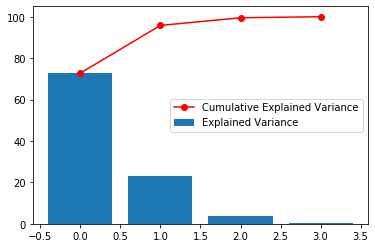

In [24]:
plt.bar(range(4), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

How many eigenValues are needed to explain more than 95% of variance?

### Projections

Since only 2 eigenVectors are enough to explain more than 95% of variance, we'll create the projection matrix using the first 2 eigenVectors.

In [25]:
COUNT = 2
W = eigenVectors[:, 0:COUNT]
W

array([[-0.52237162, -0.37231836],
       [ 0.26335492, -0.92555649],
       [-0.58125401, -0.02109478],
       [-0.56561105, -0.06541577]])

In [26]:
projX = np.dot(X_std, W)
X.shape, projX.shape

((150, 4), (150, 2))

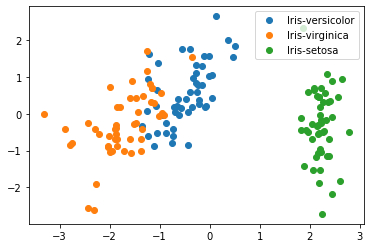

In [27]:
for label in labels:
    plt.plot(projX[y==label, 0], projX[y==label, 1], 'o', label=label)
    plt.legend(loc='upper right')

What has PCA helped us achieve here?

1. Visualization: easier visualization of all 3 classes
2. Classification: a flower of unknown class can be plotted here, and then classified visually or using algorithms (such as KNNs) 

We have used PCA on numerical data. But can it used on Image data?

## Eigenfaces

Let's face the Eigen.

### Intro

**Eigenfaces** is the name given to a set of **eigenvectors** when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification.

Eigenfaces refers to an appearance-based approach to face recognition that seeks to capture the variation in a collection of face images and use this information to encode and compare images of individual faces in a holistic (as opposed to a parts-based or feature-based) manner. 

The motivation of Eigenfaces is twofold:

1. Extract the relevant facial information, which may or may not be directly related to human intuition of face features such as the eyes, nose, and lips. One way to do so is to capture the statistical variation between face images.
2. Represent face images efficiently. To reduce the computation and space complexity, each face image can be represented using a small number of parameters.

Images are downloaded from [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/).

In [28]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=e153301e271a0e5ff0d7a5f45580a364e83749cb4b064c28e1f573a2b03b38f5
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import wget
import math

In [30]:
# Download and unzip dataset.
filename = wget.download('https://github.com/aps1070-2019/datasets/raw/master/lfw-a.tgz', 'lfw-a.tgz')
!tar -xvzf "{filename}"

lfw/Aaron_Eckhart/
lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg
lfw/Aaron_Guiel/
lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg
lfw/Aaron_Patterson/
lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg
lfw/Aaron_Peirsol/
lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg
lfw/Aaron_Pena/
lfw/Aaron_Pena/Aaron_Pena_0001.jpg
lfw/Aaron_Sorkin/
lfw/Aaron_Sorkin/Aaron_Sorkin_0001.jpg
lfw/Aaron_Sorkin/Aaron_Sorkin_0002.jpg
lfw/Aaron_Tippin/
lfw/Aaron_Tippin/Aaron_Tippin_0001.jpg
lfw/Abba_Eban/
lfw/Abba_Eban/Abba_Eban_0001.jpg
lfw/Abbas_Kiarostami/
lfw/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg
lfw/Abdel_Aziz_Al-Hakim/
lfw/Abdel_Aziz_Al-Hakim/Abdel_Aziz_Al-Hakim_0001.jpg
lfw/Abdel_Madi_Shabneh/
lfw/Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg
lfw/Abdel_Nasser_Assidi/
lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0001.jpg
lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0002.jpg
lfw/Abdoulaye_Wade/
lfw/Abdoulay

In [0]:
# constants
IMAGE_DIR = 'lfw'
DEFAULT_SIZE = [250, 250] 

In [0]:
# Reads images from filesystem and returns Array of images and imageNames.
def readImages(imagePath = IMAGE_DIR, defaultSize = DEFAULT_SIZE):
    images = []
    imageNames = []
    imageDirs = [image for image in os.listdir(imagePath) if not image.startswith('.')]

    for imageDir in imageDirs:
        dirPath = os.path.join(imagePath, imageDir)
        dirImageNames = [image for image in os.listdir(dirPath) if not image.startswith('.')]
        
        for imageName in dirImageNames:
            image = Image.open(os.path.join(dirPath, imageName))
            image = image.convert ("L") # L stands for Luminance: converts image to grayscale
            
            if (defaultSize is not None):
                image = image.resize(defaultSize, Image.ANTIALIAS) # resize image
                
            images.append(np.asarray(image, dtype = np.uint8))
            imageNames.append(imageDir)
    return [images, imageNames]

In [0]:
[X, y] = readImages()

In [34]:
type(X), len(X)

(list, 1054)

In [35]:
type(X[0]), X[0].shape

(numpy.ndarray, (250, 250))

In [36]:
type(y), len(y)

(list, 1054)

### Exploratory Data Analysis

Check from dataset if this image has correct label.

Image name is:  Alfonso_Portillo


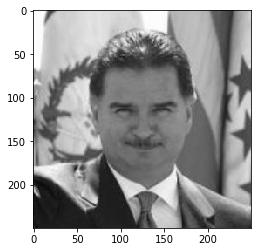

In [37]:
print('Image name is: ', y[2])
plt.imshow(X[2], cmap=plt.cm.gray)
plt.show()

Creating a mean face from all dataset faces.

In [0]:
def asRowMatrix(X):
    if len(X) == 0: return np.array([])
    rowMatrix = np.empty((0, X[0].size), dtype = X[0].dtype)
    for img in X:
        rowMatrix = np.vstack((rowMatrix, np.asarray(img).reshape(1, -1)))
    return rowMatrix

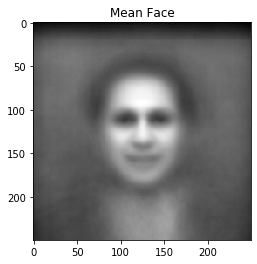

In [39]:
XMat = asRowMatrix(X);
meanImage = np.reshape(XMat.mean(axis=0), X[0].shape)
plt.imshow(meanImage, cmap=plt.cm.gray)
plt.title('Mean Face')
plt.show()

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

#### Using Covariance Matrix

In [0]:
def getBasisCountThatPreservesVariance(eigenValues, variance=.95):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
        if cumulativeSum > variance:
            return idx
        
def pca(X, y):
    n, d = X.shape
    print(n,d)
    mu = X.mean(axis=0)
    print(mu.shape)
    X = X - mu # standardising data
    
    if n > d:
        C = np.dot(X.T, X) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
    else:
        C = np.dot(X, X.T) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
        eigenVectors = np.dot(X.T, eigenVectors)
        for i in range(n):
            eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])
            
    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    
    # select based on numOfBasis
    numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
    print('Number of useful eigenBasis are: ', numOfBasis)
    eigenValues = eigenValues[0:numOfBasis].copy()
    eigenVectors = eigenVectors[:, 0:numOfBasis].copy()
    return eigenValues, eigenVectors, mu

Below image explains the PCA code above:

<img src='https://github.com/aps1070-2019/datasets/raw/master/img/eig-decom.png' />

In [41]:
eigenValues, eigenVectors, mean = pca(XMat, y)
print(mean)

1054 62500
(62500,)
Number of useful eigenBasis are:  298
[58.38614801 58.73814042 59.13282732 ... 77.14705882 76.47912713
 75.80550285]


In [0]:
# Above code in pca method is written because below code is computationally time taking.
# C = np.dot(XMat.T, XMat) # covariance matrix
# eigenValues, eigenVectors = np.linalg.eigh(C)

#### EigenFaces

**What were dimensions of eigenVector in the case of Iris example?**

Array of size = number of features (4 in the case of Iris).
Array of size 4.

**What will be dimensions of eigenVector in this example?**

Array of size = feature size (62500). 

In [43]:
eigenVectors[:, 0].shape

(62500,)

If the dimensions of eigenVector is same as the vectorised image.

What if eigenVector is displayed in image format.

This is called **eigenFace.**

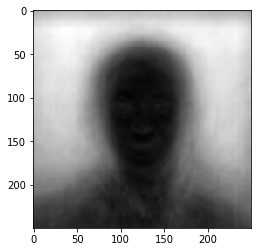

In [44]:
# show the first eigenFace
plt.imshow(eigenVectors[:, 0].reshape(-1, 250), cmap = plt.cm.gray)

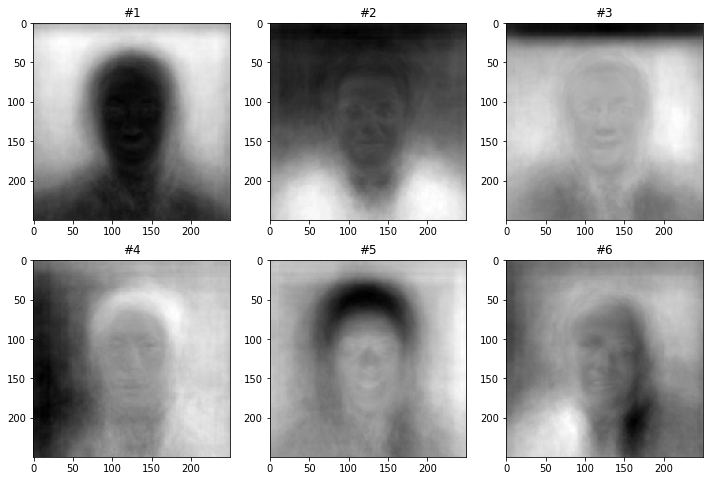

In [45]:
# print first 6 eigen faces
COUNT = 6
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 250), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

By only using first few eigenFaces:
1. How would you get a face with white hair.
2. Answer the same for black hair.

Have a good look at eigenFace number 5.

Good luck sleeping tonight.

1. **Plot the next 6 eigenFaces.**
2. **Do you observe any difference observed between the first 6 and second 6.**

### Projections

Now, we will reconstruct an image from the dataset using eigenFaces (eigenVectors).

In [0]:
IMAGE_IDX = 10 # image idx in dataset

In [0]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

In [0]:
# create reconstructed images
COUNT = 6 # count of first eigenVectors used to reconstruct the image
reconImages = []
for numEvs in range (1, COUNT+1):
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

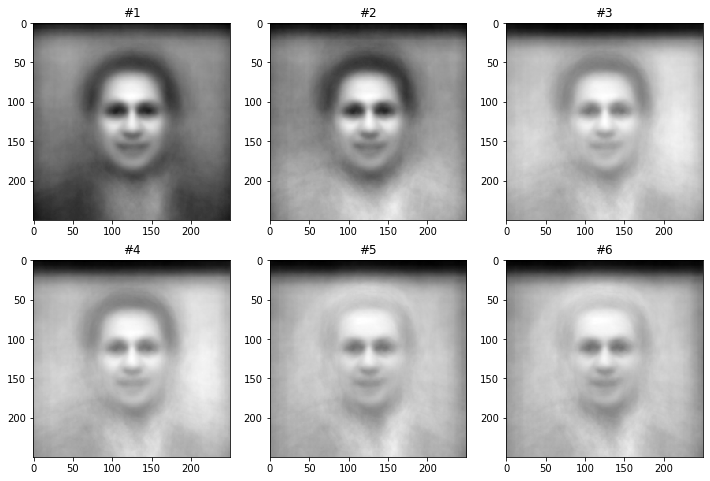

In [49]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

In [0]:
# create reconstructed images
numEvsSet = [100, 200, 298] # these no. of eigenVectors will be used to reconstruct the image.
COUNT = len(numEvsSet)
reconImages = []
for numEvs in numEvsSet:
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

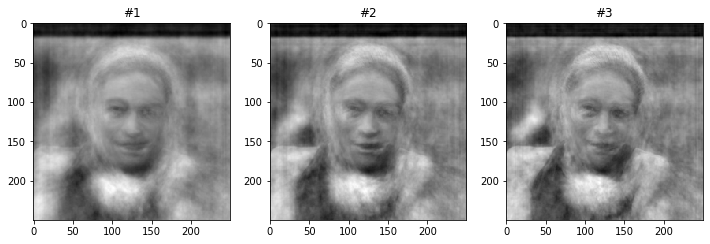

In [51]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

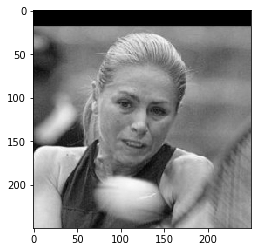

In [52]:
# actual image
plt.imshow(X[IMAGE_IDX], cmap=plt.cm.gray)
plt.show()

Can you identify the person after 298 eigenVector reconstruction?

### Facial Recognition (Optional)

**How a new point would be classified on the IRIS dataset after PCA.**

1. Projecting all training samples into the PCA subspace.
2. Projecting the query image into the PCA subspace.
3. Finding the nearest neighbor (one algorithm to accomplish this) between the projected training images and the projected query image. 

**How would a new face be classified (facial recognition) after PCA.**



**FunFact: EigenFaces is still often considered as a baseline comparison method to demonstrate the minimum expected performance of a facial recognition system.**

## Time Series Data - Exercises

The clock is ticking.

The dataset is of Tuberculosis prevalence over various countries between the given time period.

Data url: 'https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv'.

Answer the below questions.

You are free to do the below analysis over other time-series datasets of your interest (eg: financial stock data, etc.), provided the dataset has at least 15 columns (time points / features) and at least 100 rows (data points).

**Hints for getting the vectorized coding mark**
1.   Use np.dot instead of a loop to calculate the dot product
2.   If you want to subtract(add, multiply, divide) a constant from a vector, an array or a matrix, use vectorized coding.
3. If you want to do an element-wise operation between vectors, arrays or matrixes, use vectorized coding
4.   When you calculate the residual error in **Q3** and **Q5**, use vectorized coding. 

### Question 1

1. Display 30 random samples of the original time series data in a 10 x 3 (3 plots each in 10 rows) graph format.[0.5]  
2. Do you see any recurring patterns (ie oscillations, monotonic increase or decrease, other trends)?[0.5] **Yes**

In [0]:
df_1 = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv')

In [54]:
df_1

,"TB prevalence, all forms (per 100 000 population per year)",1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130
205,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387


In [0]:
df_2 = df_1.sample(n = 30)

In [0]:
df_2 = df_2.replace(',','', regex=True)

In [57]:
df_3 = df_2.drop(['TB prevalence, all forms (per 100 000 population per year)'], axis = 1)
df_3

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
41,88,85,82,79,76,73,71,69,67,61,51,62,60,58,55,53,44,43
27,32,30,28,26,25,23,22,21,20,19,19,18,18,17,16,17,16,16
31,288,302,292,293,305,322,339,346,424,412,455,522,581,619,639,654,657,647
24,160,156,154,150,143,134,131,125,96,80,70,63,66,63,55,58,58,55
128,112,107,104,76,69,60,58,97,97,51,51,43,34,28,29,29,25,25
20,140,138,135,132,129,125,127,129,130,128,128,129,137,139,134,135,134,135
193,9,9,10,10,9,9,9,9,9,9,9,9,9,10,10,11,11,12
115,101,93,86,80,74,68,64,58,52,48,42,38,35,33,31,27,25,23
94,95,87,85,84,85,94,109,137,163,134,141,148,150,155,152,147,144,139
163,52,52,53,50,49,49,50,50,48,44,39,36,34,32,31,28,27,27


In [58]:
k_range = range(0,30)
i_range = np.arange(1,30)
x = np.arange(1990, 2008) # years
x_list = x.tolist()
print('x =', x_list)
y_list = []
for k in k_range:
  y_series = df_3.iloc[k]
  y_list = y_series.tolist()
  y_list = [int(i) for i in y_list] 
  y[k] = y_list
  print('y', k, '=', y[k])

x = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007]
y 0 = [88, 85, 82, 79, 76, 73, 71, 69, 67, 61, 51, 62, 60, 58, 55, 53, 44, 43]
y 1 = [32, 30, 28, 26, 25, 23, 22, 21, 20, 19, 19, 18, 18, 17, 16, 17, 16, 16]
y 2 = [288, 302, 292, 293, 305, 322, 339, 346, 424, 412, 455, 522, 581, 619, 639, 654, 657, 647]
y 3 = [160, 156, 154, 150, 143, 134, 131, 125, 96, 80, 70, 63, 66, 63, 55, 58, 58, 55]
y 4 = [112, 107, 104, 76, 69, 60, 58, 97, 97, 51, 51, 43, 34, 28, 29, 29, 25, 25]
y 5 = [140, 138, 135, 132, 129, 125, 127, 129, 130, 128, 128, 129, 137, 139, 134, 135, 134, 135]
y 6 = [9, 9, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 11, 11, 12]
y 7 = [101, 93, 86, 80, 74, 68, 64, 58, 52, 48, 42, 38, 35, 33, 31, 27, 25, 23]
y 8 = [95, 87, 85, 84, 85, 94, 109, 137, 163, 134, 141, 148, 150, 155, 152, 147, 144, 139]
y 9 = [52, 52, 53, 50, 49, 49, 50, 50, 48, 44, 39, 36, 34, 32, 31, 28, 27, 27]
y 10 = [346, 335, 325, 315, 304, 295, 290, 285, 

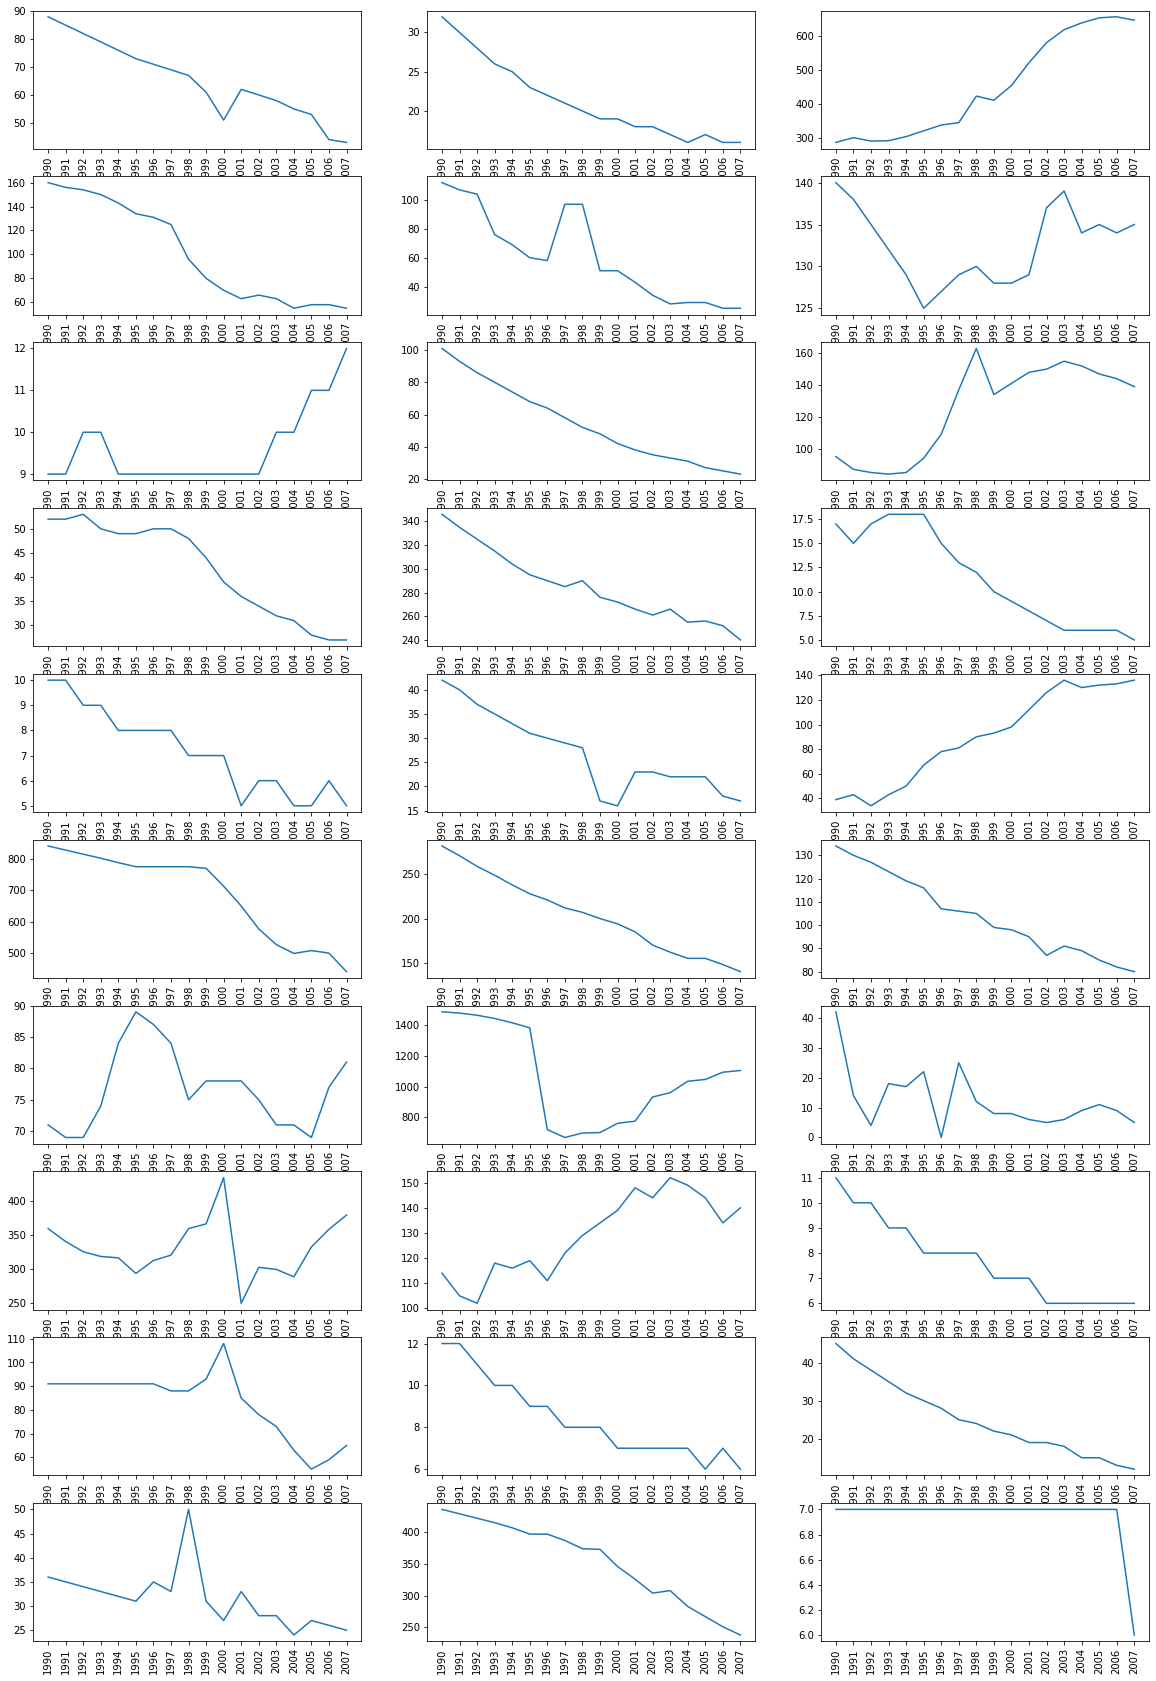

In [59]:
i_range = np.arange(1,31)
plt.figure(figsize=(20,30))
fig.subplots_adjust(wspace=2, hspace=0.5)
for i in i_range:
  plt.subplot(10, 3, i)
  j = i - 1
  plt.plot(x,y[j])
  plt.xticks(x, rotation=90)

### Question 2

1. Show the first 6 principle components plotted as a time series (in a 3 plots/row format).[0.5]  
2. Based on your knowledge of the dataset contents, can you explain what any of the principle components might represent?[0.5]  **PCA discovers properties that show as much variation across all the sampled countries as possible in a time series format.**

In [0]:
x_1 = df_2.iloc[:,1:19].values
y_1 = df_2.iloc[:,0].values

In [61]:
y_1

array(['Colombia', 'British Virgin Islands', 'Burundi',
       'Bosnia and Herzegovina', 'New Caledonia', 'Benin',
       'United Kingdom', 'Mexico', 'Kazakhstan', 'Singapore',
       'Sao Tome and Principe', 'Puerto Rico', 'Cayman Islands',
       'Turks and Caicos Islands', 'Guyana', 'Korea Dem. Rep.', 'Ecuador',
       'Morocco', 'Qatar', 'Djibouti', 'American Samoa', 'Gabon',
       'Uzbekistan', 'Israel', 'Brunei Darussalam', 'Denmark', 'Chile',
       'Samoa', 'Afghanistan', 'Grenada'], dtype=object)

In [62]:
labels_1 = set(y_1)
labels_1

{'Afghanistan',
 'American Samoa',
 'Benin',
 'Bosnia and Herzegovina',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Burundi',
 'Cayman Islands',
 'Chile',
 'Colombia',
 'Denmark',
 'Djibouti',
 'Ecuador',
 'Gabon',
 'Grenada',
 'Guyana',
 'Israel',
 'Kazakhstan',
 'Korea Dem. Rep.',
 'Mexico',
 'Morocco',
 'New Caledonia',
 'Puerto Rico',
 'Qatar',
 'Samoa',
 'Sao Tome and Principe',
 'Singapore',
 'Turks and Caicos Islands',
 'United Kingdom',
 'Uzbekistan'}

In [63]:
x_1 = x_1.astype(np.int)
x_1

array([[  88,   85,   82,   79,   76,   73,   71,   69,   67,   61,   51,
          62,   60,   58,   55,   53,   44,   43],
       [  32,   30,   28,   26,   25,   23,   22,   21,   20,   19,   19,
          18,   18,   17,   16,   17,   16,   16],
       [ 288,  302,  292,  293,  305,  322,  339,  346,  424,  412,  455,
         522,  581,  619,  639,  654,  657,  647],
       [ 160,  156,  154,  150,  143,  134,  131,  125,   96,   80,   70,
          63,   66,   63,   55,   58,   58,   55],
       [ 112,  107,  104,   76,   69,   60,   58,   97,   97,   51,   51,
          43,   34,   28,   29,   29,   25,   25],
       [ 140,  138,  135,  132,  129,  125,  127,  129,  130,  128,  128,
         129,  137,  139,  134,  135,  134,  135],
       [   9,    9,   10,   10,    9,    9,    9,    9,    9,    9,    9,
           9,    9,   10,   10,   11,   11,   12],
       [ 101,   93,   86,   80,   74,   68,   64,   58,   52,   48,   42,
          38,   35,   33,   31,   27,   25,   23],


In [0]:
x_1_std = StandardScaler().fit_transform(x_1)

In [65]:
n_1, m_1 = x_1_std.shape
print(n_1, m_1)

# Compute covariance matrix
C_1 = np.dot(x_1_std.T, x_1_std) / (n_1-1) 

# Eigen decomposition
eigenValues_1, eigenVectors_1 = np.linalg.eig(C_1) 
eigenVectors_1, eigenValues_1

30 18


(array([[ 2.35562948e-01, -3.45157188e-01, -5.24942137e-03,
          9.12444854e-02, -2.63295033e-01,  4.08533679e-02,
         -2.84649423e-01,  1.03081446e-01, -5.86657170e-01,
          2.35104546e-02, -4.00988346e-01,  4.79641330e-02,
          2.22462604e-01, -5.95643347e-02, -2.36475077e-01,
         -1.68661679e-01,  8.84928002e-02, -3.64943934e-02],
        [ 2.35978665e-01, -3.35358282e-01, -1.86350297e-02,
          2.79390419e-02, -1.90243847e-01, -3.97783420e-02,
         -2.23194273e-01, -2.49237641e-01,  1.20356706e-02,
          9.51060493e-02,  1.14378281e-01,  3.71031604e-01,
         -5.49481786e-01,  7.35836147e-02,  3.79815924e-01,
          1.75625077e-01,  1.70752961e-01, -9.73056848e-02],
        [ 2.35671844e-01, -3.43062250e-01, -2.19858714e-02,
          1.74893233e-03, -1.51957322e-01, -9.35285998e-03,
         -1.51987944e-01, -2.99134495e-01,  3.58586952e-01,
          1.00195739e-01,  4.45265546e-01,  3.64879484e-04,
          5.49283992e-01, -8.68190026e

In [0]:
args_1 = (-eigenValues_1).argsort()
eigenValues_1 = eigenValues_1[args_1]
eigenVectors_1 = eigenVectors_1[:, args_1]

In [67]:
eigenValues_1

array([1.76071137e+01, 5.06579046e-01, 4.76222379e-01, 2.18359660e-02,
       3.66088012e-03, 2.24894865e-03, 1.12853670e-03, 7.98564926e-04,
       4.54196795e-04, 2.98132050e-04, 1.22593482e-04, 8.00811291e-05,
       5.30673616e-05, 4.99401245e-05, 2.12801019e-05, 1.65891653e-05,
       3.90617374e-06, 1.82368683e-06])

In [68]:
eigenVectors_1.shape

(18, 18)

In [69]:
eigValSum_1 = sum(eigenValues_1)
expVar_1 = [eigVa/eigValSum_1*100 for eigVa in eigenValues_1]
cumExpVar_1 = np.cumsum(expVar_1)
cumExpVar_1

array([ 94.55672185,  97.27723895,  99.8347295 ,  99.95199673,
        99.97165701,  99.9837347 ,  99.98979536,  99.99408395,
        99.99652315,  99.99812423,  99.9987826 ,  99.99921267,
        99.99949766,  99.99976586,  99.99988014,  99.99996923,
        99.99999021, 100.        ])

In [70]:
len(expVar_1)

18

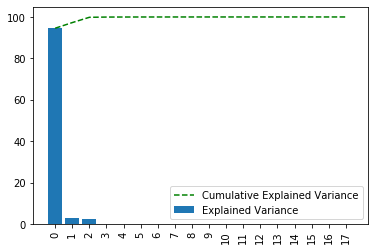

In [71]:
plt.bar(range(18), expVar_1, label = "Explained Variance")
plt.plot(cumExpVar_1, 'g--', label = 'Cumulative Explained Variance')
plt.xticks(range(18), rotation=90)
plt.legend()
plt.show()

In [72]:
count = 6
w_1 = eigenVectors_1[:, 0:count]
w_1

array([[ 0.23556295, -0.00524942, -0.34515719,  0.09124449, -0.26329503,
         0.04085337],
       [ 0.23597867, -0.01863503, -0.33535828,  0.02793904, -0.19024385,
        -0.03977834],
       [ 0.23567184, -0.02198587, -0.34306225,  0.00174893, -0.15195732,
        -0.00935286],
       [ 0.23601549, -0.02922337, -0.33413929, -0.01456205,  0.12732036,
         0.04818867],
       [ 0.23664542, -0.03550653, -0.31604627, -0.0118401 ,  0.22075363,
         0.05931287],
       [ 0.23730628, -0.04463711, -0.29325896, -0.10785462,  0.31932552,
         0.18311535],
       [ 0.23392168,  0.36771678,  0.03686394, -0.13164835,  0.23783552,
        -0.73828031],
       [ 0.23183827,  0.4057608 ,  0.08734486, -0.08352357, -0.37165354,
        -0.17654847],
       [ 0.23372379,  0.33310559,  0.17787548,  0.06181267, -0.5095712 ,
         0.29975506],
       [ 0.23419749,  0.32538859,  0.17160124,  0.15065325,  0.33452965,
         0.18728053],
       [ 0.23667706,  0.20510836,  0.19863132,  0.

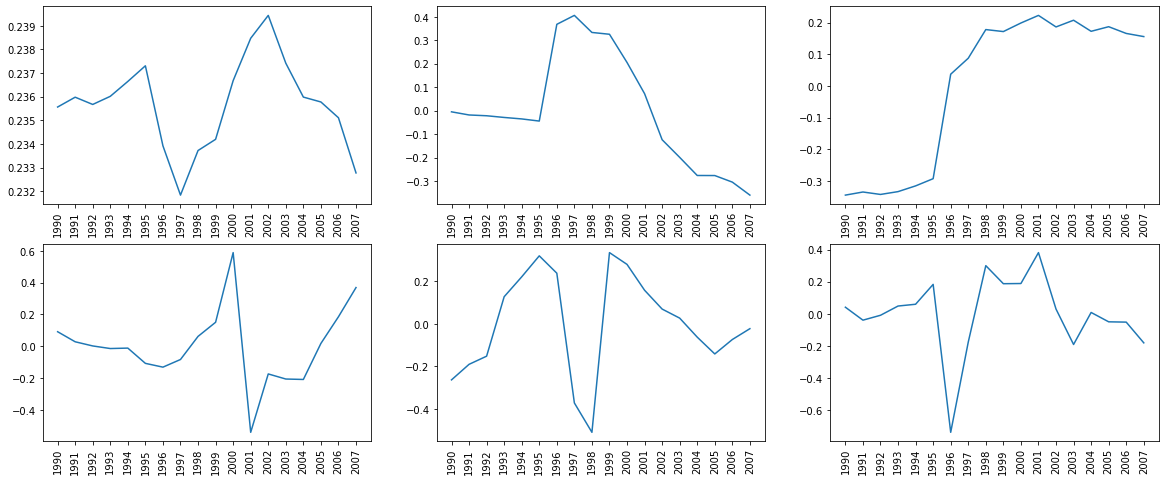

In [73]:
i_range = np.arange(1,7)
plt.figure(figsize=(20,8))
for i in i_range:
  plt.subplot(2, 3, i)
  j = i - 1
  plt.plot(x,w_1[:,j])
  plt.xticks(x, rotation=90)

### Question 3

1. Pick an interesting data sample (ie, data from a single country) and display it.[0.5] 

2. Next, show its incremental reconstruction using the first 1-6 components overlayed on the original data (again plotted as a time series in a 3 plots/row format, 6 plots in total).[1]

3. In addition, show another plot with the residual error of each reconstruction compared to the original sample and a title that states the RMSE of the reconstruction for each of the 6 components (again plotted as a time series in a 3 plots/row format, 6 plots in total).[1]

In [0]:
country = x_1[10] # a country's TB data from 1990 to 2007

In [75]:
print(country) # TB data for a particular country from 1990 to 2007

[346 335 325 315 304 295 290 285 290 276 272 266 261 266 255 256 252 240]


([<matplotlib.axis.XTick at 0x7f55283de748>,
 <a list of 18 Text xticklabel objects>)

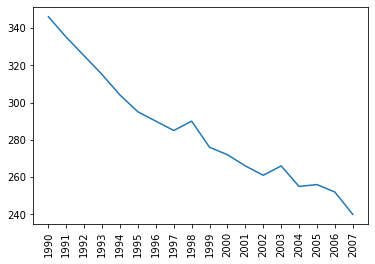

In [76]:
plt.plot(x, country)
plt.xticks(x, rotation=90)

In [77]:
mu_1 = x_1.mean(axis=0)
print(mu_1.shape)

(18,)


In [78]:
x_1.shape

(30, 18)

In [0]:
def project_1 (w_1 , x_1 , mu_1):
    return np.dot (x_1-mu_1, w_1)
def reconstruct_1 (w_1 , Y_1 , mu_1) :
    return np.dot (Y_1 , w_1.T) + mu_1

In [0]:
# create reconstructed images
count_1 = 6 # count of first eigenVectors used to reconstruct the image
reconImages_1 = []
for numEvs_1 in range (1, count_1 + 1):
    P_1 = project_1(eigenVectors_1[:, 0:numEvs_1], country.reshape(1, -1), mu_1)
    R_1 = reconstruct_1(eigenVectors_1[:, 0:numEvs_1], P_1, mu_1)
    reconImages_1.append(R_1.reshape(x_1[0].shape))

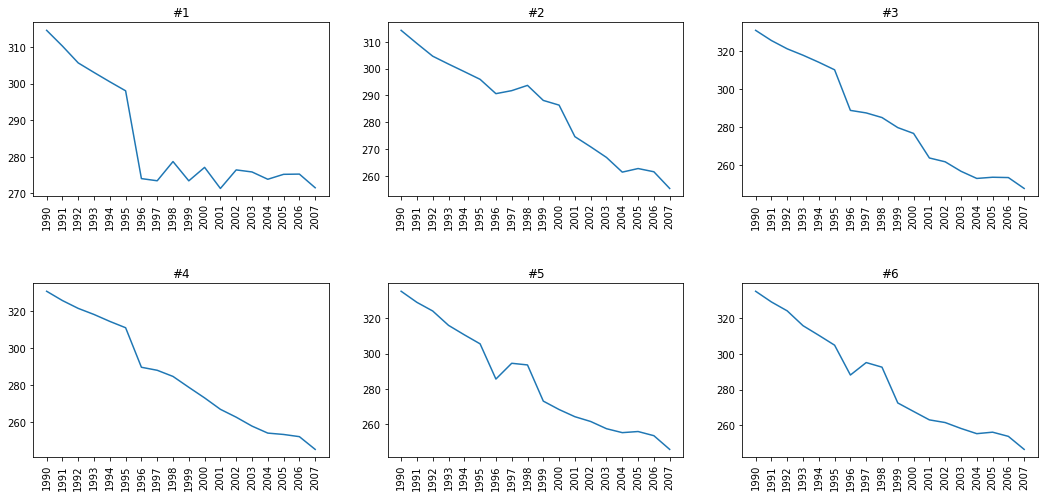

In [81]:
# plot reconstructed time series plots
fig = plt.figure(figsize=(18, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.5)
for i in range(0, count_1):
    plt.subplot(2, 3, i+1)
    plt.plot(x, reconImages_1[i])
    plt.title('#{}'.format(i+1))
    plt.xticks(x, rotation=90)

In [82]:
import math 
rmse_list = []
for i in range(0,6):
  residual_error = np.subtract(country,reconImages_1[i])
  err = (np.sum(np.square(residual_error))).mean()
  rmse = math.sqrt(err)
  rmse_list.append(rmse)
print(rmse_list)

[72.88676721709646, 57.176250685974935, 29.98127022071574, 29.37144249142219, 23.757400286894462, 23.506943772492246]


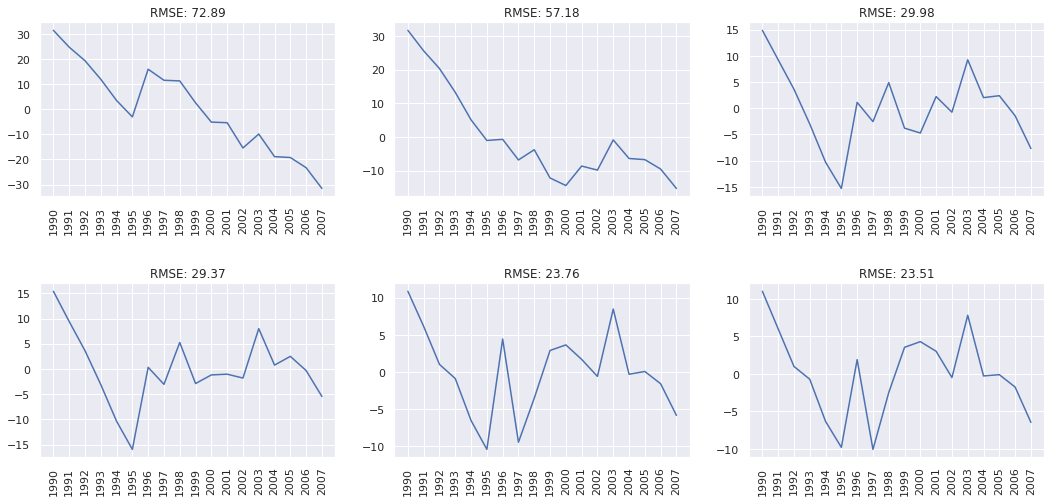

In [83]:
import seaborn as sns
sns.set()
i_range = np.arange(6)
j_range = np.arange(18)
residual_list = []
err_list = []
fig = plt.figure(figsize=(18, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.5)
for i in i_range:
  recondata = reconImages_1[i]
  residual_error = np.subtract(country,recondata)
  err = (np.sum(np.square(residual_error))).mean()
  rmse = math.sqrt(err)
  for j in j_range:
    residual_error = country[j] - recondata[j]
    residual_list.append(residual_error)
  plt.subplot(2, 3, i+1)
  plt.plot(x, residual_list)
  plt.xticks(x, rotation=90)
  plt.title("RMSE: %.2f" % (rmse))
  residual_list = []

In [84]:
a=1 ##############check 
print("For year:", x[a]) #for a specific year x[a]
print("'a'th index value of the original data:", country[a])
recondata=reconImages_1[0] #[i]: ith reconstructed graph where i = 0 to 5th graph 
print("'a'th index value of the reconstructed data:", recondata[a])
print("Residual error:", country[a]-recondata[a])

For year: 1991
'a'th index value of the original data: 335
'a'th index value of the reconstructed data: 310.2758672843637
Residual error: 24.7241327156363


### Question 4

1. Plot the eigenvalues of the first 15 (or more) principle components and choose a number k of principle components that you believe will allow you to reconstruct the data well.[0.5]  
2. How many did you choose and why? Use some plots to support your claim[0.5] **I chose k = 6 because just 6 eigen values explain more than 99% of the data's spread and help construct an approximately fair pattern of the original interesting sample.**

In [85]:
eigenValues_1

array([1.76071137e+01, 5.06579046e-01, 4.76222379e-01, 2.18359660e-02,
       3.66088012e-03, 2.24894865e-03, 1.12853670e-03, 7.98564926e-04,
       4.54196795e-04, 2.98132050e-04, 1.22593482e-04, 8.00811291e-05,
       5.30673616e-05, 4.99401245e-05, 2.12801019e-05, 1.65891653e-05,
       3.90617374e-06, 1.82368683e-06])

([<matplotlib.axis.XTick at 0x7f5527c58048>,
 <a list of 18 Text xticklabel objects>)

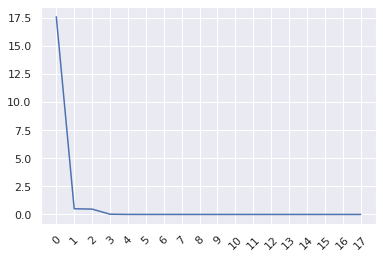

In [86]:
plt.plot(j_range, eigenValues_1)
plt.xticks(j_range, rotation=45)

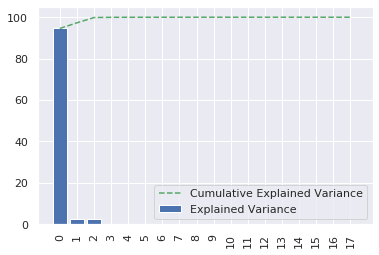

In [87]:
plt.bar(range(18), expVar_1, label = "Explained Variance")
plt.plot(cumExpVar_1, 'g--', label = 'Cumulative Explained Variance')
plt.xticks(range(18), rotation=90)
plt.legend()
plt.show()

In [88]:
expVar_1[0] + expVar_1[1] +expVar_1[2] + expVar_1[3] + expVar_1[4] + expVar_1[5]   

99.98373469645287

In [89]:
count_2 = 6
w_2 = eigenVectors_1[:, 0:count_2]
w_2

array([[ 0.23556295, -0.00524942, -0.34515719,  0.09124449, -0.26329503,
         0.04085337],
       [ 0.23597867, -0.01863503, -0.33535828,  0.02793904, -0.19024385,
        -0.03977834],
       [ 0.23567184, -0.02198587, -0.34306225,  0.00174893, -0.15195732,
        -0.00935286],
       [ 0.23601549, -0.02922337, -0.33413929, -0.01456205,  0.12732036,
         0.04818867],
       [ 0.23664542, -0.03550653, -0.31604627, -0.0118401 ,  0.22075363,
         0.05931287],
       [ 0.23730628, -0.04463711, -0.29325896, -0.10785462,  0.31932552,
         0.18311535],
       [ 0.23392168,  0.36771678,  0.03686394, -0.13164835,  0.23783552,
        -0.73828031],
       [ 0.23183827,  0.4057608 ,  0.08734486, -0.08352357, -0.37165354,
        -0.17654847],
       [ 0.23372379,  0.33310559,  0.17787548,  0.06181267, -0.5095712 ,
         0.29975506],
       [ 0.23419749,  0.32538859,  0.17160124,  0.15065325,  0.33452965,
         0.18728053],
       [ 0.23667706,  0.20510836,  0.19863132,  0.

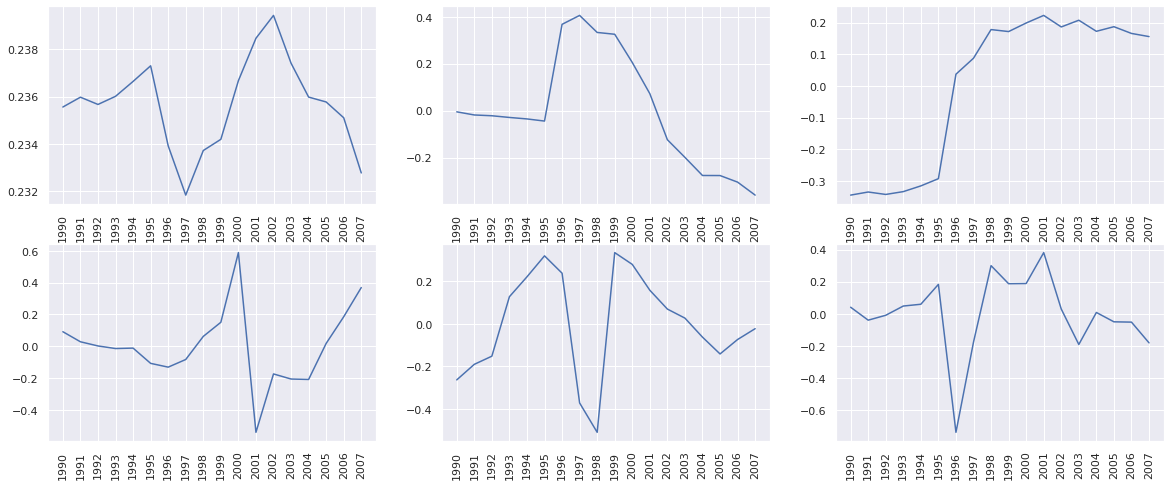

In [115]:
i_range = np.arange(1,7)
plt.figure(figsize=(20,8))
fig.subplots_adjust(wspace=0.2, hspace=0.5)
for i in i_range:
  plt.subplot(2, 3, i)
  j = i - 1
  plt.plot(x,w_2[:,j])
  plt.xticks(x, rotation=90)

In [0]:
def project_2 (w_2 , x_1 , mu_1):
    return np.dot (x_1-mu_1, w_2)
def reconstruct_2 (w_2 , Y_2 , mu_1) :
    return np.dot (Y_2 , w_2.T) + mu_1

In [0]:
# create reconstructed images
count_2 = 6 # count of first eigenVectors used to reconstruct the image
reconImages_2 = []
for numEvs_2 in range (1, count_2 + 1):
    P_2 = project_2(eigenVectors_1[:, 0:numEvs_2], country.reshape(1, -1), mu_1)
    R_2 = reconstruct_2(eigenVectors_1[:, 0:numEvs_2], P_2, mu_1)
    reconImages_2.append(R_2.reshape(x_1[0].shape))

In [93]:
reconImages_2

[array([314.57740701, 310.27586728, 305.67145818, 303.06306526,
        300.51430237, 298.04944509, 274.06227864, 273.46728427,
        278.71860571, 273.44939487, 277.1319403 , 271.36528848,
        276.43767807, 275.87754156, 273.87860314, 275.22979933,
        275.29082223, 271.55687823]),
 array([314.34011475, 309.43349856, 304.67761965, 301.74206646,
        298.90928281, 296.03169124, 290.68436724, 291.80909603,
        293.77614712, 288.15810082, 286.40355768, 274.62229063,
        270.82407563, 266.8637089 , 261.3749207 , 262.71469859,
        261.50863405, 255.27288421]),
 array([331.14415574, 325.76047799, 321.37966819, 318.00969901,
        314.2960535 , 310.3090574 , 288.88963936, 287.55669527,
        285.11624682, 279.80366281, 276.73315569, 263.78238389,
        261.75921568, 256.76533444, 252.98119178, 253.61289107,
        253.44233874, 247.69102705]),
 array([330.59520864, 325.5923905 , 321.36914622, 318.09730754,
        314.36728619, 310.95793479, 289.68166509, 288.

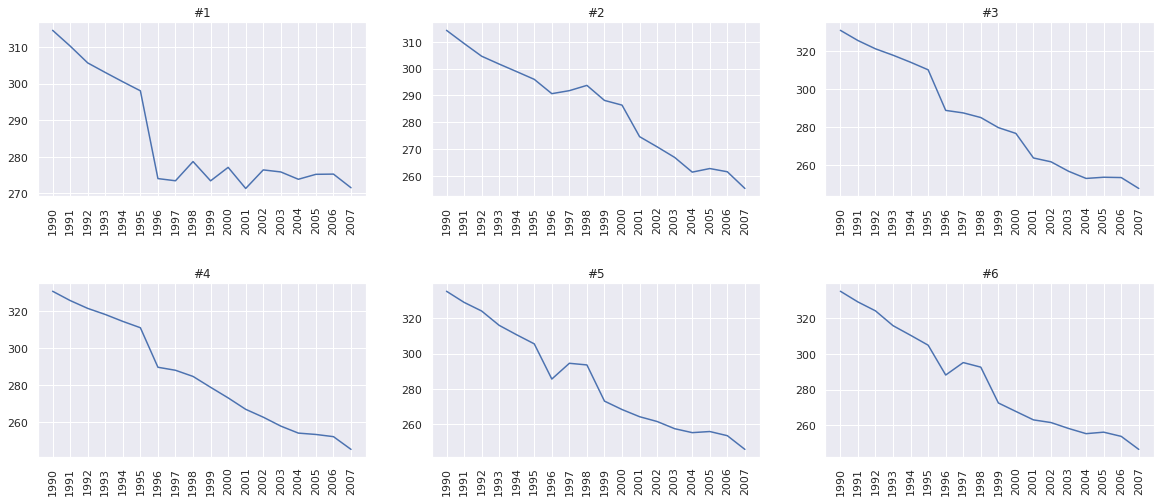

In [112]:
# plot reconstructed time series plots
fig = plt.figure(figsize=(20, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.5)
for i in range(0, count_2):
    plt.subplot(2, 3, i+1)
    plt.plot(x, reconImages_2[i])
    plt.title('#{}'.format(i+1))
    plt.xticks(x, rotation=90)

### Question 5

1. Compute the mean (M) and standard deviation (StD) of the interesting data sample selected in question 3.[0.5]

  Random walk refers to any process in which there is no observable pattern or trend; that is, where the movements of an object, or the values taken by a certain variable, are completely random. Each "step" taken in a random walk can be sampled from a distribution. You may find the methods numpy.random.normal, numpy.cumsum useful for creating random walks. 

2. Make 6 time series of random walks of the same length as the time series in this dataset. Random walks created should have the same mean M and standard deviation StD as the data sample choosen. Each next step in the random walk is some Uniform or Gaussian perturbation from the previous sample.[1]
    - Show for a sample random walk it's mean and standard deviation matches M and StD respectively.
    - Visualize these 6 time series in a 2 x 3 plot.


3. Show the reconstruction of each time series using k principle components overlayed on the original random walk. Plot this in a 2 x 3 plot and report the RMSE of the reconstruction in the title of each plot.[1]
4. Compare these RMSE values with the ones you got for question 3 and explain the result.[0.5]

In [95]:
country #interesting sample chosen

array([346, 335, 325, 315, 304, 295, 290, 285, 290, 276, 272, 266, 261,
       266, 255, 256, 252, 240])

In [96]:
M = np.mean(country)
StD = np.std(country)
print("Mean:", M)
print("Std:", StD)

Mean: 284.94444444444446
Std: 29.472156770269766


For run: 1
Initial samples stats   : mean = -2.4827 stdv = 1.5434
True zero samples stats : mean = -0.0000 stdv = 1.5434
Scaled samples stats    : mean = -0.0000 stdv = 29.4722
Final samples stats     : mean = 284.9444 stdv = 29.4722
[338.36639887 354.08503045 324.13986327 306.236559   299.03386009
 304.3936459  290.82331245 278.486977   273.03400786 268.88376659
 261.82704233 256.69602612 248.72411467 253.90033271 272.69157456
 257.86120687 267.23562719 272.58065404]


For run: 2
Initial samples stats   : mean = 10.5394 stdv = 6.5114
True zero samples stats : mean = 0.0000 stdv = 6.5114
Scaled samples stats    : mean = 0.0000 stdv = 29.4722
Final samples stats     : mean = 284.9444 stdv = 29.4722
[250.07307036 245.72974179 256.86587468 252.95765168 253.65302876
 259.90839302 251.66886044 274.37919881 280.99627262 282.59550402
 291.32432163 307.60987836 311.12927297 317.46374737 317.34699343
 330.17798905 322.85828479 322.26191623]


For run: 3
Initial samples stats   : mean = 3.4380 s

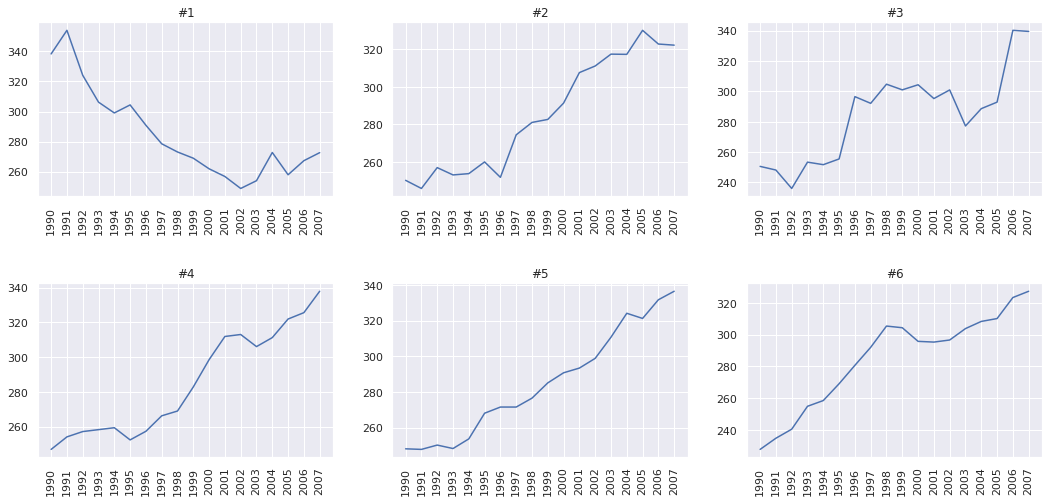

In [97]:
desired_mean = M
desired_std_dev = StD
i_range = range(0,6)
fig = plt.figure(figsize=(18, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.5)
final_samples_list = []

for i in i_range:
  print("For run:", i+1)
  samples = np.cumsum(np.random.normal(loc=i, scale=i+1, size=18))
  
  actual_mean = np.mean(samples)
  actual_std = np.std(samples)
  print("Initial samples stats   : mean = {:.4f} stdv = {:.4f}".format(actual_mean, actual_std))

  zero_mean_samples = samples - (actual_mean)

  zero_mean_mean = np.mean(zero_mean_samples)
  zero_mean_std = np.std(zero_mean_samples)
  print("True zero samples stats : mean = {:.4f} stdv = {:.4f}".format(zero_mean_mean, zero_mean_std))

  scaled_samples = zero_mean_samples * (desired_std_dev/zero_mean_std)
  scaled_mean = np.mean(scaled_samples)
  scaled_std = np.std(scaled_samples)
  print("Scaled samples stats    : mean = {:.4f} stdv = {:.4f}".format(scaled_mean, scaled_std))

  final_samples = scaled_samples + desired_mean
  final_mean = np.mean(final_samples)
  final_std = np.std(final_samples)
  print("Final samples stats     : mean = {:.4f} stdv = {:.4f}".format(final_mean, final_std))

  print(final_samples)
  print('\n')
  final_samples_list.append(final_samples) 
  
  plt.subplot(2, 3, i+1)
  plt.plot(x, final_samples)
  plt.title('#{}'.format(i+1))
  plt.xticks(x, rotation=90)

In [98]:
final_samples_list #List consisting of all adjusted random walks

[array([338.36639887, 354.08503045, 324.13986327, 306.236559  ,
        299.03386009, 304.3936459 , 290.82331245, 278.486977  ,
        273.03400786, 268.88376659, 261.82704233, 256.69602612,
        248.72411467, 253.90033271, 272.69157456, 257.86120687,
        267.23562719, 272.58065404]),
 array([250.07307036, 245.72974179, 256.86587468, 252.95765168,
        253.65302876, 259.90839302, 251.66886044, 274.37919881,
        280.99627262, 282.59550402, 291.32432163, 307.60987836,
        311.12927297, 317.46374737, 317.34699343, 330.17798905,
        322.85828479, 322.26191623]),
 array([250.59803882, 248.18196813, 236.05268878, 253.38880915,
        251.72686449, 255.49508425, 296.54758051, 292.12610432,
        304.73873424, 301.01913994, 304.36778537, 295.28035938,
        300.96481459, 277.22096978, 288.63605235, 292.92477617,
        340.22619262, 339.50403711]),
 array([246.85647826, 254.05937726, 257.11440606, 258.22678743,
        259.33162425, 252.32222684, 257.27720474, 266.

In [0]:
x_rw = np.array(final_samples_list)

In [0]:
mu_2 = x_rw.mean(axis=0)

In [0]:
def project_3 (w_1 , x_rw , mu_2):
    return np.dot (x_rw-mu_2, w_1)
def reconstruct_3 (w_1 , Y_2 , mu_2) :
    return np.dot (Y_2 , w_1.T) + mu_2

In [0]:
# create reconstructed images
count_3 = 6 # count of first eigenVectors used to reconstruct the image
reconImages_3 = []
for k in range(0,6):
  for numEvs_3 in range (1, count_3 + 1):
      P_3 = project_3(eigenVectors_1[:, 0:numEvs_3], x_rw[k].reshape(1, -1), mu_2)
      R_3 = reconstruct_3(eigenVectors_1[:, 0:numEvs_3], P_3, mu_2)
      reconImages_3.append(R_3.reshape(x_rw[0].shape))

In [0]:
reconImages_4_list = []
i_list = [5,11,17,23,29,35]
for i in i_list:
  reconImages_4 = reconImages_3[i]
  reconImages_4_list.append(reconImages_4)

In [104]:
reconImages_4_list

[array([328.13440538, 328.72048532, 325.64922306, 318.470613  ,
        312.98543564, 311.09366326, 286.92451543, 293.17281248,
        277.81299041, 262.53182731, 254.35398831, 251.76982868,
        253.76910594, 249.0291859 , 260.95419514, 261.6976329 ,
        274.85232367, 277.33002704]),
 array([248.32168812, 252.42990959, 249.65500889, 251.9666728 ,
        252.9727223 , 262.44686384, 256.28120271, 270.27002503,
        286.41502844, 283.72222802, 285.02324095, 311.88185031,
        307.81667989, 308.1795608 , 321.14363004, 319.79856158,
        330.02950831, 330.86217982]),
 array([248.6009231 , 251.86704191, 247.36736557, 248.50435202,
        249.42057387, 252.36890985, 290.54346724, 292.62440646,
        298.3179631 , 304.68789779, 315.15739321, 287.90428538,
        294.24918184, 294.3063983 , 297.67081105, 305.7303518 ,
        320.85945284, 328.60985909]),
 array([247.55290442, 252.28749021, 249.61224069, 255.01997335,
        257.13193025, 266.10235872, 259.83001716, 263.

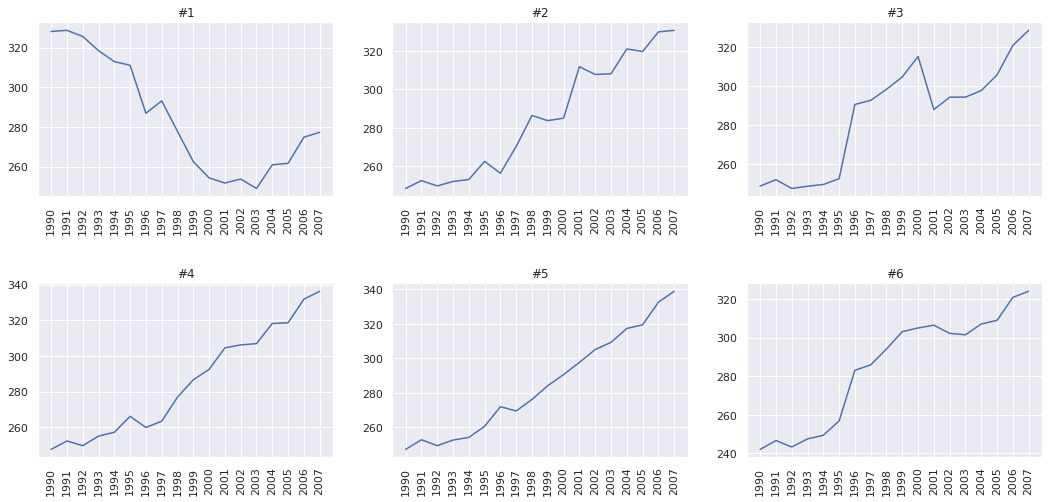

In [116]:
# plot reconstructed time series plots
fig = plt.figure(figsize=(18, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.5)
for i in range(0, count_3):
  plt.subplot(2, 3, i+1)
  plt.plot(x, reconImages_4_list[i])
  plt.title('#{}'.format(i+1))
  plt.xticks(x, rotation=90)

In [106]:
import math 
rmse_1_list = []
for i in range(0,6):
  residual_error_1 = np.subtract(final_samples_list[i],reconImages_4_list[i])
  err_1 = (np.sum(np.square(residual_error_1))).mean()
  rmse_1 = math.sqrt(err_1)
  rmse_1_list.append(rmse_1)
print(rmse_1_list)

[42.37864771484625, 24.068589400640196, 39.02205575002443, 24.40075460825173, 14.911649642106102, 32.864546091149464]


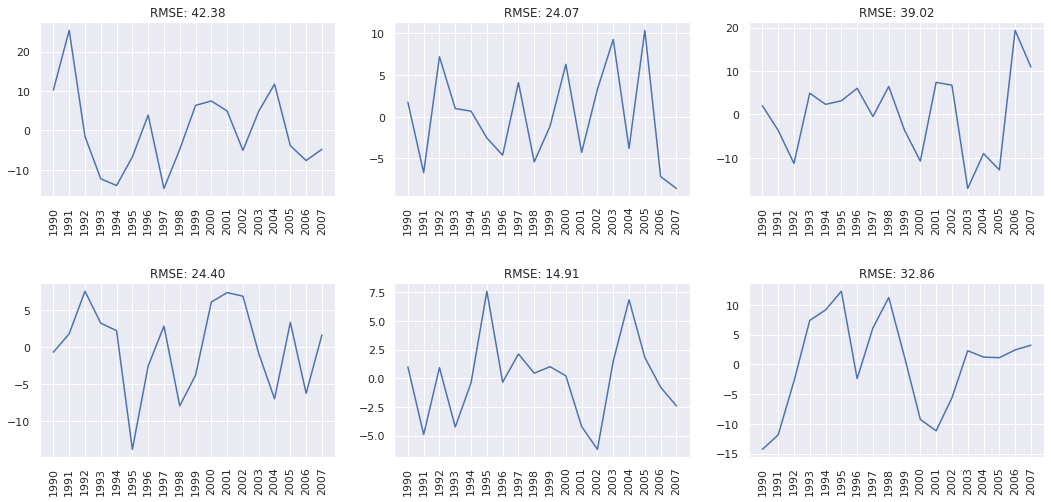

In [107]:
import seaborn as sns
sns.set()
i_range = np.arange(6)
j_range = np.arange(18)
residual_1_list = []
fig = plt.figure(figsize=(18, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.5)
for i in i_range:
  recondata_1 = reconImages_4_list[i]
  final_samples_list1 = final_samples_list[i]
  residual_error_1 = np.subtract(final_samples_list[i],reconImages_4_list[i])
  err_1 = (np.sum(np.square(residual_error_1))).mean()
  rmse_1 = math.sqrt(err_1) 
  for j in j_range:
    residual_error_1 = final_samples_list1[j] - recondata_1[j]
    residual_1_list.append(residual_error_1)
  plt.subplot(2, 3, i+1)
  plt.plot(x, residual_1_list)
  plt.xticks(x, rotation=90)
  plt.title("RMSE: %.2f" % (rmse_1))
  residual_1_list = []

In [108]:
print("RMSE of PCA reconstruction:", rmse_list)
print("RMSE of Random walk reconstruction:", rmse_1_list)

RMSE of PCA reconstruction: [72.88676721709646, 57.176250685974935, 29.98127022071574, 29.37144249142219, 23.757400286894462, 23.506943772492246]
RMSE of Random walk reconstruction: [42.37864771484625, 24.068589400640196, 39.02205575002443, 24.40075460825173, 14.911649642106102, 32.864546091149464]


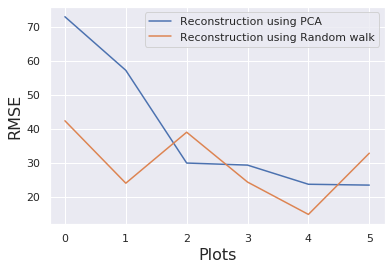

In [109]:
plots = range(0,6)
plt.plot(plots, rmse_list, label="Reconstruction using PCA") # blue curve
plt.plot(plots, rmse_1_list, label="Reconstruction using Random walk") # red curve
plt.xlabel('Plots', fontsize=16)
plt.ylabel('RMSE', fontsize=16)
plt.legend(loc="upper right")

The RMSE, from reconstruction using PCA, drops gradually. This is due to the decrease in the residual error with every increment in PC which contributes a better understanding of the data. On the other hand, the RMSE obtained from reconstruction from random walks fluctuates arbitraryly which is due to the randomness nature of the orginal random walk data which and is only able to reconstruct our "interesting example" because of the matched mean and std devaition.    

### Question 6

Explain how could you use PCA to do anomaly detection.[0.5]

To begin with, 
*  We can construct a covariance matrix of the (30,18) dataset and compute the eigen vectors from this matrix.  
*  Next, the eigenvectors that correspond to the largest eigenvalues (the principal components) can now be used to reconstruct a large fraction of the variance of the original data.
*   In this case, I would chose the first two principal componenets as they explain more than 95% of the variance of the original data ( as seen above). 
*   Now, the datapoints represented by PC1 and PC2 will exhibit some form of distribution, e.g. guassian distribution, and help view PC1 and PC2 analogous to x1 and x2 from multivariate guassian distribution. 

*   We can then calculate the mean vector and covariance matrix composed of the std deviations. From these, then fetch the p(x) from the prescribed formula. 
*   Define a threshold (r) against which p(x) will be compared to determine whether or not a given datapoint is anomoly, i.e. if the p(x)<r, the datapoint is an anomoly otherwise not. This is because normal examples tend to have a large p(x) while anomalous examples tend to have a small p(x).  



    

## References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Eigenfaces:
1. Snippets from: https://github.com/svetlana-topalova/eigenfaces/blob/master/Eigenfaces.ipynb
2. https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/

Author: Parth Jaggi
Modified by: Zheda Mai